In [1]:
import pandas as pd
import numpy as np

filename='cleaned'
Pacific=pd.read_excel(filename+'.xlsx',sheet_name='Pacific')
Atlantic=pd.read_excel(filename+'.xlsx',sheet_name='Atlantic')
Mediterranean=pd.read_excel(filename+'.xlsx',sheet_name='Mediterranean')
Southern=pd.read_excel(filename+'.xlsx',sheet_name='Southern Ocean')
Arctic=pd.read_excel(filename+'.xlsx',sheet_name='Arctic')

In [6]:
# add a column ocean to each dataframe
Pacific['ocean']='Pacific'
Atlantic['ocean']='Atlantic'
Mediterranean['ocean']='Mediterranean'
Southern['ocean']='Southern'
Arctic['ocean']='Arctic'

### relation C

In [9]:
new_p=Pacific[['Cr_%','Cr_nmol/kg','Depth','Lat', 'Long','ocean']]
new_a=Atlantic[['Cr_%','Cr_nmol/kg','Depth','Lat', 'Long','ocean']]
new_m=Mediterranean[['Cr_%','Cr_nmol/kg','Depth','Lat', 'Long','ocean']]
new_s=Southern[['Cr_%','Cr_nmol/kg','Depth','Lat', 'Long','ocean']]
new_ar=Arctic[['Cr_%','Cr_nmol/kg','Depth','Lat', 'Long','ocean']]
df=pd.concat([new_p,new_a,new_m,new_s,new_ar],ignore_index=True)
df

,Cr_%,Cr_nmol/kg,Depth,Lat,Long,ocean
0,NaN,NaN,0.0,21,-132,Pacific
1,NaN,3.190219,25.0,21,-132,Pacific
2,NaN,3.132063,50.0,21,-132,Pacific
3,NaN,NaN,75.0,21,-132,Pacific
4,NaN,3.424319,100.0,21,-132,Pacific
...,...,...,...,...,...,...
1077,1.36,1.950000,20.4,72.8,-159.62,Arctic
1078,3.85,1.570000,54.9,72.8,-159.62,Arctic
1079,4.15,1.520000,79.6,72.8,-159.62,Arctic
1080,NaN,NaN,NaN,NaN,NaN,Arctic


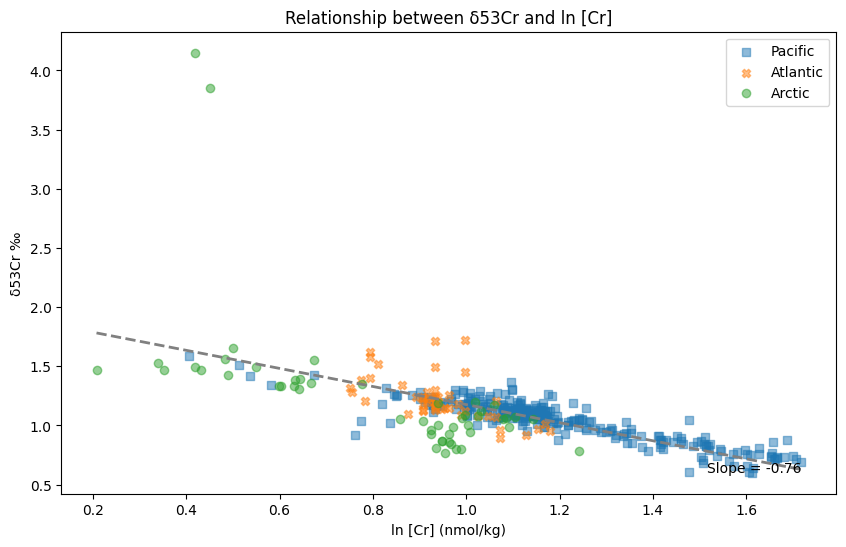

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = df.dropna(subset=['Cr_%', 'Cr_nmol/kg'])  # drop  NaN

df['ln_Cr'] = np.log(df['Cr_nmol/kg'])

plt.figure(figsize=(10,6))


ocean_markers = {"Pacific": "s", "Atlantic": "X", "Arctic": "o"}  

for ocean, marker in ocean_markers.items():
    df_ocean = df[df['ocean'] == ocean]
    plt.scatter(df_ocean['ln_Cr'], df_ocean['Cr_%'], marker=marker, label=ocean, alpha=0.5)  
    
# Fit a line of best fit to the data
slope, intercept = np.polyfit(df['ln_Cr'], df['Cr_%'], 1)
x = np.linspace(df['ln_Cr'].min(), df['ln_Cr'].max(), 100)  
y = slope * x + intercept 

plt.plot(x, y, color='grey', linewidth=2, linestyle='dashed') 

plt.text(df['ln_Cr'].max(), df['Cr_%'].min(), f"Slope = {slope:.2f}", horizontalalignment='right') 

plt.xlabel('ln [Cr] (nmol/kg)')
plt.ylabel('δ53Cr ‰')
plt.legend()
plt.title('Relationship between δ53Cr and ln [Cr]')
plt.show()



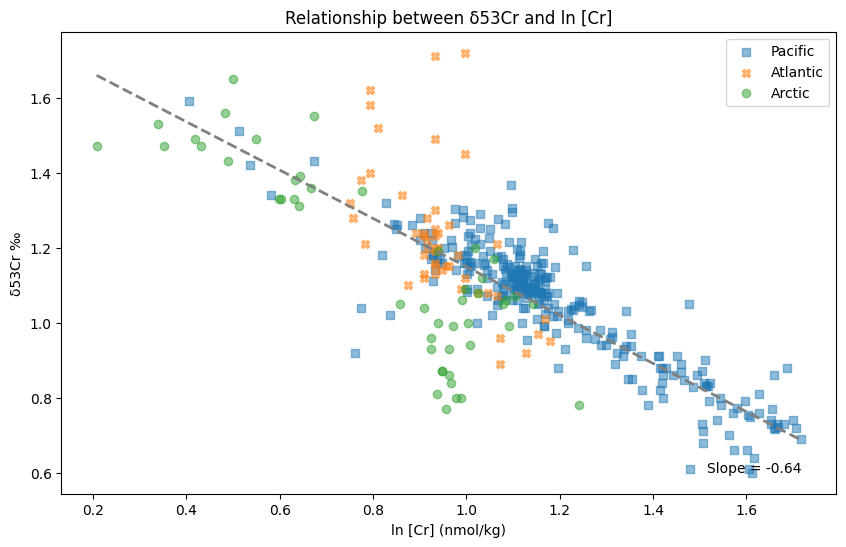

In [12]:
# drop Cr_% over 3.5 
df = df[df['Cr_%'] < 3.5]
df = df.dropna(subset=['Cr_%', 'Cr_nmol/kg'])  # drop  NaN

df['ln_Cr'] = np.log(df['Cr_nmol/kg'])

plt.figure(figsize=(10,6))


ocean_markers = {"Pacific": "s", "Atlantic": "X", "Arctic": "o"}  

for ocean, marker in ocean_markers.items():
    df_ocean = df[df['ocean'] == ocean]
    plt.scatter(df_ocean['ln_Cr'], df_ocean['Cr_%'], marker=marker, label=ocean, alpha=0.5)  
    
# Fit a line of best fit to the data
slope, intercept = np.polyfit(df['ln_Cr'], df['Cr_%'], 1)
x = np.linspace(df['ln_Cr'].min(), df['ln_Cr'].max(), 100)  
y = slope * x + intercept 

plt.plot(x, y, color='grey', linewidth=2, linestyle='dashed') 

plt.text(df['ln_Cr'].max(), df['Cr_%'].min(), f"Slope = {slope:.2f}", horizontalalignment='right') 

plt.xlabel('ln [Cr] (nmol/kg)')
plt.ylabel('δ53Cr ‰')
plt.legend()
plt.title('Relationship between δ53Cr and ln [Cr]')
plt.show()

### relation B

In [13]:
Pacific.columns

Index(['Unnamed: 0', 'Location', 'Cruise', 'Stn/Loc', 'Lat', 'Long', 'Depth',
       'Cr_%', 'Cr_2pie', 'Cr_QF', 'Cr_nmol/kg', 'Cr_SD', 'Cr_QF.2',
       'Filtered_%', 'Filtered_2SEM', 'Filtered_Cr', 'Cr(III)_nmol/kg',
       'Cr(III)_SD', 'Cr(III)_QF', 'Cr(III) filt out', 'Seawater', 'Source',
       'Notes', 'Year', 'ocean'],
      dtype='object')

In [14]:
new_p=Pacific[['Cr_%','Cr(III)_nmol/kg','Depth','Lat', 'Long','ocean']]
new_a=Atlantic[['Cr_%','Cr(III)_nmol/kg','Depth','Lat', 'Long','ocean']]
new_m=Mediterranean[['Cr_%','Cr(III)_nmol/kg','Depth','Lat', 'Long','ocean']]
new_s=Southern[['Cr_%','Cr(III)_nmol/kg','Depth','Lat', 'Long','ocean']]
new_ar=Arctic[['Cr_%','Cr(III)_nmol/kg','Depth','Lat', 'Long','ocean']]
df=pd.concat([new_p,new_a,new_m,new_s,new_ar],ignore_index=True)
df

,Cr_%,Cr(III)_nmol/kg,Depth,Lat,Long,ocean
0,NaN,0.097561,0.0,21,-132,Pacific
1,NaN,0.000000,25.0,21,-132,Pacific
2,NaN,0.204878,50.0,21,-132,Pacific
3,NaN,0.000000,75.0,21,-132,Pacific
4,NaN,0.097561,100.0,21,-132,Pacific
...,...,...,...,...,...,...
1077,1.36,NaN,20.4,72.8,-159.62,Arctic
1078,3.85,NaN,54.9,72.8,-159.62,Arctic
1079,4.15,NaN,79.6,72.8,-159.62,Arctic
1080,NaN,NaN,NaN,NaN,NaN,Arctic


> missing error bars


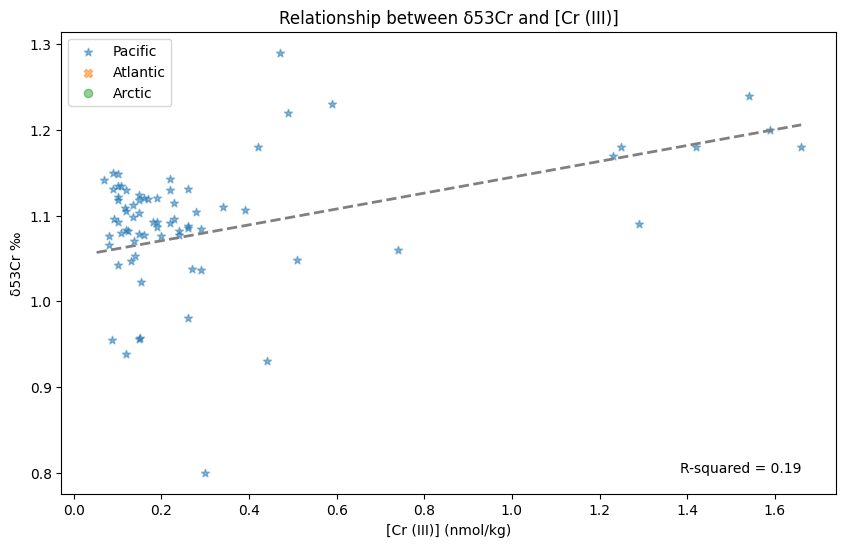

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


df = df.dropna(subset=['Cr_%', 'Cr(III)_nmol/kg']) 

plt.figure(figsize=(10,6))


ocean_markers = {"Pacific": "*", "Atlantic": "X", "Arctic": "o"} 

for ocean, marker in ocean_markers.items():
    df_ocean = df[df['ocean'] == ocean]
    plt.scatter(df_ocean['Cr(III)_nmol/kg'], df_ocean['Cr_%'], marker=marker, label=ocean, alpha=0.5)  


slope, intercept, r_value, p_value, std_err = stats.linregress(df['Cr(III)_nmol/kg'], df['Cr_%'])
x = np.linspace(df['Cr(III)_nmol/kg'].min(), df['Cr(III)_nmol/kg'].max(), 100) 
y = slope * x + intercept  

plt.plot(x, y, color='grey', linewidth=2, linestyle='dashed')  

plt.text(df['Cr(III)_nmol/kg'].max(), df['Cr_%'].min(), f"R-squared = {r_value**2:.2f}", horizontalalignment='right') 

plt.xlabel('[Cr (III)] (nmol/kg)')
plt.ylabel('δ53Cr ‰')
plt.legend()
plt.title('Relationship between δ53Cr and [Cr (III)]')
plt.show()


### relatinship a

In [17]:
# read data 
ncp= pd.read_csv('ncp_means_new.csv')


,Lat,Long,Ocean,Cr_nmol/kg,Year,yearly_mean_ncp,ncp_01,ncp_02,ncp_03,ncp_04,ncp_05,ncp_06,ncp_07,ncp_08,ncp_09,ncp_10,ncp_11,ncp_12
0,-67.290000,163.536000,Southern Ocean,3.835823,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-67.189000,145.721000,Southern Ocean,3.781016,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-67.100000,167.360000,Southern Ocean,3.858050,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-63.963000,-66.242000,Southern Ocean,3.811317,1997,106.702427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.296214,147.108640
4,-59.611000,148.640000,Southern Ocean,3.780237,1997,112.878433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.631372,113.216944,167.786981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011,71.100000,-139.016667,Arctic,1.995342,2022,250.128792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.106871,226.150713,NaN,NaN,NaN
3012,72.516667,-136.683333,Arctic,2.416848,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3013,72.800000,-159.620000,Arctic,1.667500,2022,172.203703,NaN,NaN,NaN,NaN,NaN,NaN,244.855624,155.657283,116.098203,NaN,NaN,NaN
3014,74.633333,-137.333333,Arctic,2.839957,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
mld_Cr= pd.read_csv('mld_Cr.csv')
mld_Cr

,Lat,Long,Depth,Cr_nmol/kg,Year,yearly_mean_mld
0,50.0,-145.00,10.0,2.585366,1997,46.03057
1,50.0,-145.00,10.0,2.585366,1997,46.03057
2,50.0,-145.00,10.0,2.585366,1997,46.03057
3,50.0,-145.00,10.0,2.585366,1997,46.03057
4,50.0,-145.00,10.0,2.585366,1997,46.03057
...,...,...,...,...,...,...
1097,72.8,-159.62,1.0,1.630000,2018,29.14392
1098,72.8,-159.62,20.4,1.950000,2018,29.14392
1099,72.8,-159.62,20.4,1.950000,2018,29.14392
1100,72.8,-159.62,20.4,1.950000,2018,29.14392


In [24]:
# merge the mld to ncp with year lat lon
ncp_mld = pd.merge(ncp, mld_Cr, on=['Year', 'Lat', 'Long'], how='left')

ncp_mld=ncp_mld[['Lat', 'Long', 'Ocean', 'Cr_nmol/kg_x', 'Year', 'yearly_mean_ncp','Cr_nmol/kg_y', 'yearly_mean_mld']]
ncp_mld

,Lat,Long,Ocean,Cr_nmol/kg_x,Year,yearly_mean_ncp,Cr_nmol/kg_y,yearly_mean_mld
0,-67.290000,163.536000,Southern Ocean,3.835823,1997,NaN,NaN,NaN
1,-67.189000,145.721000,Southern Ocean,3.781016,1997,NaN,NaN,NaN
2,-67.100000,167.360000,Southern Ocean,3.858050,1997,NaN,NaN,NaN
3,-63.963000,-66.242000,Southern Ocean,3.811317,1997,106.702427,NaN,NaN
4,-59.611000,148.640000,Southern Ocean,3.780237,1997,112.878433,NaN,NaN
...,...,...,...,...,...,...,...,...
3999,71.100000,-139.016667,Arctic,1.995342,2022,250.128792,NaN,NaN
4000,72.516667,-136.683333,Arctic,2.416848,2022,NaN,NaN,NaN
4001,72.800000,-159.620000,Arctic,1.667500,2022,172.203703,NaN,NaN
4002,74.633333,-137.333333,Arctic,2.839957,2022,NaN,NaN,NaN


In [45]:
ncp_mld['ncp_new']=((ncp_mld['yearly_mean_ncp']/ncp_mld['yearly_mean_mld'])/1.4)/8.57

<Axes: >

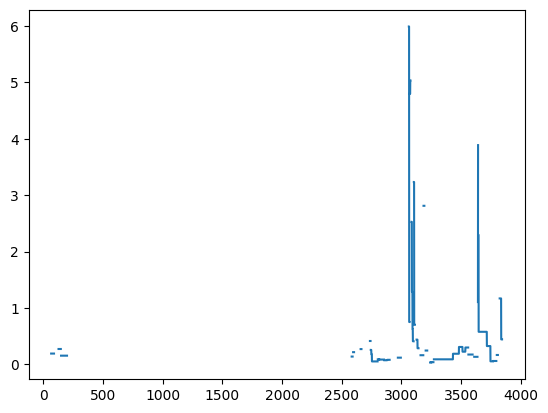

In [46]:
ncp_mld['ncp_new'].plot()

In [35]:
new_p=Pacific[['Cr(III)_nmol/kg','Lat', 'Long','ocean']]
new_a=Atlantic[['Cr(III)_nmol/kg','Lat', 'Long','ocean']]
new_m=Mediterranean[['Cr(III)_nmol/kg','Lat', 'Long','ocean']]
new_s=Southern[['Cr(III)_nmol/kg','Lat', 'Long','ocean']]
new_ar=Arctic[['Cr(III)_nmol/kg','Lat', 'Long','ocean']]
df=pd.concat([new_p,new_a,new_m,new_s,new_ar],ignore_index=True)
df

,Cr(III)_nmol/kg,Lat,Long,ocean
0,0.097561,21,-132,Pacific
1,0.000000,21,-132,Pacific
2,0.204878,21,-132,Pacific
3,0.000000,21,-132,Pacific
4,0.097561,21,-132,Pacific
...,...,...,...,...
1077,NaN,72.8,-159.62,Arctic
1078,NaN,72.8,-159.62,Arctic
1079,NaN,72.8,-159.62,Arctic
1080,NaN,NaN,NaN,Arctic


In [47]:
final= pd.merge(ncp_mld, df, on=['Lat', 'Long'], how='left')
final

,Lat,Long,Ocean,Cr_nmol/kg_x,Year,yearly_mean_ncp,Cr_nmol/kg_y,yearly_mean_mld,ncp_new,Cr(III)_nmol/kg,ocean
0,-67.29,163.536,Southern Ocean,3.835823,1997,NaN,NaN,NaN,NaN,NaN,Southern
1,-67.29,163.536,Southern Ocean,3.835823,1997,NaN,NaN,NaN,NaN,NaN,Southern
2,-67.29,163.536,Southern Ocean,3.835823,1997,NaN,NaN,NaN,NaN,NaN,Southern
3,-67.29,163.536,Southern Ocean,3.835823,1997,NaN,NaN,NaN,NaN,NaN,Southern
4,-67.29,163.536,Southern Ocean,3.835823,1997,NaN,NaN,NaN,NaN,NaN,Southern
...,...,...,...,...,...,...,...,...,...,...,...
42287,85.13,-150.1,Arctic,2.452609,2022,NaN,NaN,NaN,NaN,NaN,Arctic
42288,85.13,-150.1,Arctic,2.452609,2022,NaN,NaN,NaN,NaN,NaN,Arctic
42289,85.13,-150.1,Arctic,2.452609,2022,NaN,NaN,NaN,NaN,NaN,Arctic
42290,85.13,-150.1,Arctic,2.452609,2022,NaN,NaN,NaN,NaN,NaN,Arctic


In [48]:
final=final.dropna(subset=['Cr(III)_nmol/kg', 'ncp_new'])  # drop  NaN

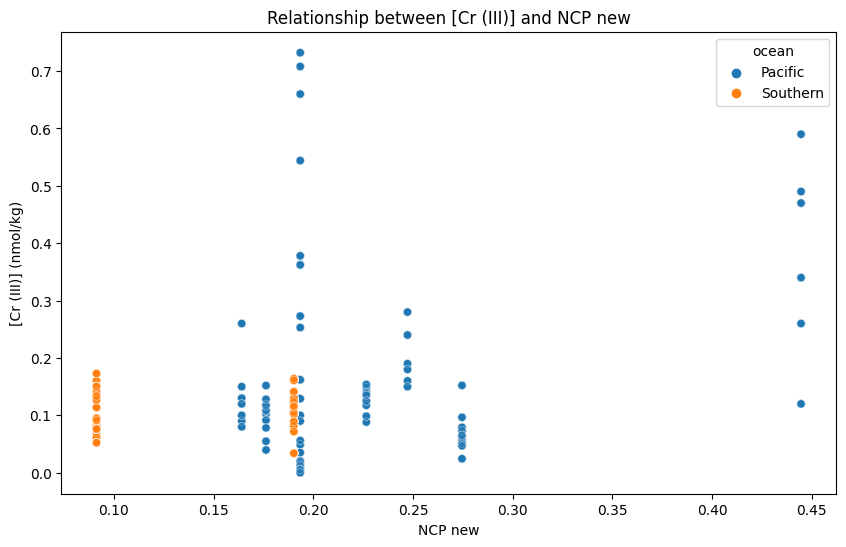

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='ncp_new', y='Cr(III)_nmol/kg', hue='ocean', data=final, alpha=0.5)

plt.xlabel('NCP new')
plt.ylabel('[Cr (III)] (nmol/kg)')
plt.title('Relationship between [Cr (III)] and NCP new')
plt.show()


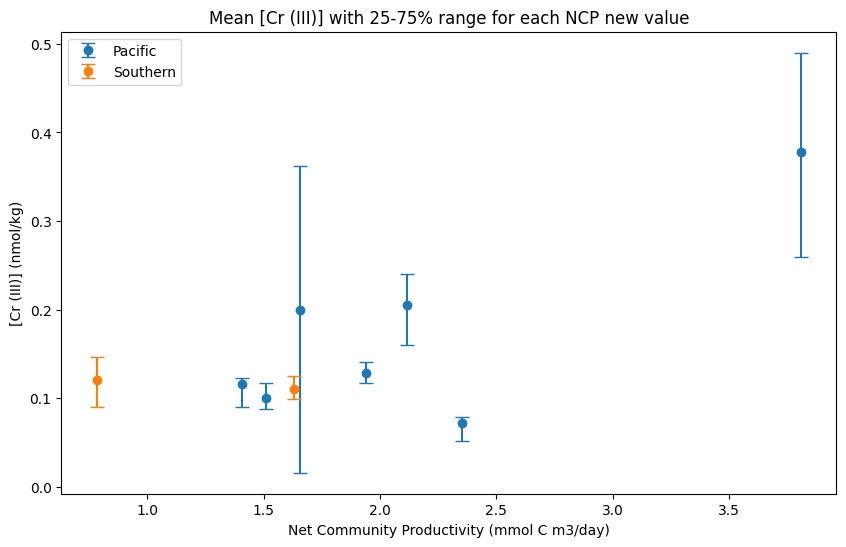

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# calculate 25% and 75% percentiles and create a new dataframe
summary = final.groupby(['ncp_new', 'ocean'])['Cr(III)_nmol/kg'].describe(percentiles=[0.25, 0.75]).reset_index()

plt.figure(figsize=(10,6))

# Use seaborn's pointplot with calculated quartiles as error bars
for ocean in final['ocean'].unique():
    ocean_data = summary[summary['ocean'] == ocean]
    plt.errorbar(ocean_data['ncp_new'], ocean_data['mean'], 
                 yerr=[ocean_data['mean'] - ocean_data['25%'], ocean_data['75%'] - ocean_data['mean']], 
                 fmt='o', label=ocean,capsize=5)

plt.xlabel('Net Community Productivity (mmol C m3/day)')
plt.ylabel('[Cr (III)] (nmol/kg)')
plt.legend()
plt.title('Mean [Cr (III)] with 25-75% range for each NCP new value')
plt.show()
